In [1]:
import pandas as pd

# Load the merged CSV file
file_path = r'C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Lay_Flat\CSV\Lay_Flat.csv'
df = pd.read_csv(file_path, encoding='utf-8-sig')

# Display the first few rows of the DataFrame to verify the data has been loaded successfully
df.head()


,问题id,页码,答主昵称,答主性别,答主粉丝数,答主主页,答主签名,回答id,回答时间,评论数,...,Top Terms,topic_prob1,topic_prob2,topic_prob3,topic_prob4,topic_prob5,max_topic,cluster_label,named_entities,aspect_candidates
0,636907409,1,谁还不曾是只猫,未知,4829,https://www.zhihu.com/people/shui-huan-bu-ceng...,一些女孩总以为她们比男人更了解男人,3345858502,2024-01-01 09:27:21,162,...,"['行业', '996', '雪峰', '张', '一定']",0.009234,0.009235,0.009256,0.963000,0.009274,4,1,"[('张雪峰', 'PERSON'), ('996', 'CARDINAL'), ('996...",['work_life_balance']
1,636907409,1,开心,男,25226,https://www.zhihu.com/people/kan-xin-94,[互联网观察员，敏感滑梯触碰者],3358530649,2024-01-11 10:47:15,148,...,"['工人', '万块', '扯', '后来', '走']",0.002523,0.002488,0.002524,0.989942,0.002524,4,1,"[('一年', 'DATE'), ('10万块', 'MONEY'), ('2', 'CAR...","['work_life_balance', 'financial_priorities']"
2,636907409,1,快乐的丑牛,男,1666,https://www.zhihu.com/people/kuai-le-de-chou-niu,半百青年，职场老兵。,3344779377,2023-12-31 06:20:55,249,...,"['胜过', '五十岁', '我活', '好点', '早就']",0.015481,0.195210,0.015619,0.185530,0.588160,5,3,"[('五十岁', 'DATE')]",['others']
3,636907409,1,大锤八十,未知,2380,https://www.zhihu.com/people/2667-72,NaN,3348091219,2024-01-03 06:48:03,260,...,"['砍', '信息', '年轻人', '几乎', '比不上']",0.000818,0.604082,0.393459,0.000821,0.000819,2,4,"[('一年', 'DATE'), ('一年多', 'DATE'), ('三板斧', 'CAR...","['work_life_balance', 'career_satisfaction', '..."
4,636907409,1,暮的猫,男,162,https://www.zhihu.com/people/mu-de-mao,游戏策划咸鱼/开发咸鱼/好吧我就是个咸鱼,3344699981,2023-12-31 04:54:22,135,...,"['月薪', '四千', '这份', '工作', '996']",0.177724,0.007271,0.007225,0.800542,0.007238,4,1,"[('一万五', 'CARDINAL'), ('996', 'CARDINAL'), ('四...",['work_life_balance']


In [2]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Remove duplicate rows
df = df.drop_duplicates()

# Display the shape of the DataFrame before and after removing duplicates
print("Shape of DataFrame before removing duplicates:", df.shape)
print("Shape of DataFrame after removing duplicates:", df.drop_duplicates().shape)


Shape of DataFrame before removing duplicates: (4583, 13)
Shape of DataFrame after removing duplicates: (4583, 13)


In [3]:
# Convert text to lowercase(Not necessary but just in case some answers are in English or French and etc.)
df['回答内容'] = df['回答内容'].str.lower()

# Remove special characters and HTML tags
df['回答内容'] = df['回答内容'].str.replace(r'<[^>]+>', '')  # Remove HTML tags
df['回答内容'] = df['回答内容'].str.replace(r'[^a-zA-Z0-9\u4e00-\u9fa5\s]', '')  # Remove special characters except Chinese characters, alphanumeric characters, and whitespace

# Display the cleaned DataFrame
df.head()


,问题id,页码,答主昵称,答主性别,答主粉丝数,答主主页,答主签名,回答id,回答时间,评论数,点赞数,喜欢数,回答内容
0,636907409,1,谁还不曾是只猫,未知,4829,https://www.zhihu.com/people/shui-huan-bu-ceng...,一些女孩总以为她们比男人更了解男人,3345858502,2024-01-01 09:27:21,162,8626,1054,很喜欢张雪峰的那句话：选工作，不要看优点，要看缺点能不能接受什么意思呢？这个行业高薪，但是 ...
1,636907409,1,开心,男,25226,https://www.zhihu.com/people/kan-xin-94,[互联网观察员，敏感滑梯触碰者],3358530649,2024-01-11 10:47:15,148,6774,683,举个例子，以前农民工工资是按年、按季度结算的，比如一年10万块，或者每个季度发2-3万块；到...
2,636907409,1,快乐的丑牛,男,1666,https://www.zhihu.com/people/kuai-le-de-chou-niu,半百青年，职场老兵。,3344779377,2023-12-31 06:20:55,249,4684,742,我活了五十岁才知道，对自己好点胜过一切。真羡慕现在的年轻人，这么早就明白了这个道理。
3,636907409,1,大锤八十,未知,2380,https://www.zhihu.com/people/2667-72,NaN,3348091219,2024-01-03 06:48:03,260,5457,1178,我也招过不少年轻人了。宁愿钱少也不想操劳的年轻人，确实是一年比一年多了。不是因为懒惰，也不是...
4,636907409,1,暮的猫,男,162,https://www.zhihu.com/people/mu-de-mao,游戏策划咸鱼/开发咸鱼/好吧我就是个咸鱼,3344699981,2023-12-31 04:54:22,135,2616,299,河神：年轻的工人哟，你找到的是这份月薪一万五、996的工作，还是这份月薪四千、965双休的工...


In [4]:
import re
import jieba

# Define a list of stop words
stop_words = set([
    "$", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "?", "_", "“", "”", "、",
    "。", "《", "》", "一", "一些", "一何", "一切", "一则", "一方面", "一旦", "一个", "一来", "一样", "一般", "一转眼",
    "万一", "两", "两个", "俩", "上", "上下", "下", "不仅", "不但", "不光", "不单", "不只", "不外乎", "不如", "不妨", "不尽",
    "不尽然", "不得", "不怕", "不惟", "不成", "不拘", "不料", "不是", "不比", "不然", "不特", "不独", "不管",
    "不至于", "不若", "不论", "不过", "不问", "与", "与其", "与其说", "与否", "与此同时", "且", "且不说",
    "且说", "两者", "个", "个别", "临", "为", "为了", "为什么", "为何", "为止", "为此", "为着", "乃", "乃至",
    "乃至于", "么", "之", "之一", "之所以", "之类", "乌乎", "乎", "乘", "也", "也好", "也罢", "了", "二来",
    "于", "于是", "于是乎", "云云", "云尔", "些", "亦", "人", "里", "人们", "人家", "什么", "什么样", "今", "介于",
    "仍", "仍旧", "从", "从此", "从而", "他", "他人", "他们", "以", "以上", "以为", "以便", "以免", "以及",
    "以故", "以期", "以来", "以至", "以至于", "以致", "们", "任", "任何", "任凭", "似的", "但", "但凡", "但是",
    "何", "何以", "何况", "何处", "何时", "余外", "作为", "你", "你们", "使", "使得", "例如", "依", "依据",
    "依照", "便于", "俺", "俺们", "倘", "倘使", "倘或", "倘然", "倘若", "借", "假使", "假如", "假若", "傥然",
    "像", "儿", "先不先", "光是", "全体", "全部", "兮", "关于", "其", "其一", "其中", "其二", "其他", "其余",
    "其它", "其次", "具体地说", "具体说来", "兼之", "内", "再", "再其次", "再则", "再有", "再者", "再者说", "再说",
    "冒", "冲", "况且", "几", "几时", "凡", "凡是", "凭", "凭借", "出于", "出来", "分别", "则", "则甚", "别",
    "别人", "别处", "别是", "别的", "别管", "别说", "到", "前后", "前此", "前者", "加之", "加以", "即", "即令",
    "即使", "即便", "即如", "即或", "即若", "却", "去", "又", "又及", "及", "及其", "及至", "反之", "反而",
    "反过来", "反过来说", "受到", "另", "另一方面", "另外", "另悉", "只", "只当", "只怕", "只是", "只有", "只消",
    "只要", "只限", "叫", "叮咚", "可", "可以", "可是", "可见", "各", "各个", "各位", "各种", "各自", "同",
    "同时", "后", "后者", "向", "向使", "向着", "吓", "吗", "否则", "吧", "吧哒", "吱", "呀", "呃", "呕", "呗",
    "呜", "呜呼", "呢", "呵", "呵呵", "呸", "呼哧", "咋", "和", "咚", "咦", "咧", "咱", "咱们", "咳", "哇",
    "哈", "哈哈", "哉", "哎", "哎呀", "哎哟", "哗", "哟", "哦", "哩", "哪", "哪个", "哪些", "哪儿", "哪天",
    "哪年", "哪怕", "哪样", "哪边", "哪里", "哼", "哼唷", "唉", "唯有", "啊", "啐", "啥", "啦", "啪达", "啷当",
    "喂", "喏", "喔唷", "喽", "嗡", "嗡嗡", "嗬", "嗯", "嗳", "嘎", "嘎登", "嘘", "嘛", "嘻", "嘿", "嘿嘿",
    "因", "因为", "因了", "因此", "因着", "因而", "固然", "在", "在下", "在于", "地", "基于", "处在", "多",
    "多么", "多少", "大", "大家", "她", "她们", "好", "如", "如上", "如上所述", "如下", "如何", "如其", "如同",
    "如是", "如果", "如此", "如若", "始而", "孰料", "孰知", "宁", "宁可", "宁愿", "宁肯", "它", "它们", "对",
    "对于", "对待", "对方", "对比", "将", "小", "尔", "尔后", "尔尔", "尚且", "就", "就是", "就是了", "就是说",
    "就算", "就要", "尽", "尽管", "尽管如此", "岂但", "己", "已", "已矣", "巴", "巴巴", "并", "并且", "并非",
    "庶乎", "庶几", "开外", "开始", "归", "归齐", "当", "当地", "当然", "当着", "彼", "彼时", "彼此", "往",
    "待", "很", "得", "得了", "怎", "怎么", "怎么办", "怎么样", "怎奈", "怎样", "总之", "总的来看", "总的来说",
    "总的说来", "总而言之", "恰恰相反", "您", "惟其", "慢说", "我", "我们", "或", "或则", "或是", "或曰", "或者",
    "截至", "所", "所以", "所在", "所幸", "所有", "才", "才能", "打", "打从", "把", "抑或", "拿", "按", "按照",
    "换句话说", "换言之", "据", "据此", "接着", "更", "故", "故此", "故而", "旁人", "无", "无宁", "无论", "既", "既往",
    "既是", "既然", "时候", "是", "是以", "是的", "就", "就是", "曾", "替", "替代", "最", "有", "有些", "有关", "有及", "有时",
    "有的", "望", "朝", "朝着", "本", "本人", "本地", "本着", "本身", "来", "来着", "来自", "来说", "极了",
    "果然", "果真", "某", "某个", "某些", "某某", "根据", "欤", "正值", "正如", "正巧", "正是", "此", "此地",
    "此处", "此外", "此时", "此次", "此间", "毋宁", "每", "每当", "比", "比及", "比如", "比方", "没奈何", "沿",
    "沿着", "漫说", "焉", "然则", "然后", "然而", "照", "照着", "犹且", "犹自", "甚且", "甚么", "甚或", "甚而",
    "甚至", "甚至于", "用", "用来", "由", "由于", "由是", "由此", "由此可见", "的", "的确", "的话", "直到", "相对而言",
    "省得", "看", "眨眼", "着", "着呢", "矣", "矣乎", "矣哉", "离", "竟而", "第", "等", "等到", "等等", "简言之",
    "管", "类如", "紧接着", "纵", "纵令", "纵使", "纵然", "经", "经过", "结果", "给", "继之", "继后", "继而",
    "综上所述", "罢了", "者", "而", "而且", "而况", "而后", "而外", "而已", "而是", "而言", "能", "能否", "腾",
    "自", "自个儿", "自从", "自各儿", "自后", "自家", "自己", "自打", "自身", "至", "至于", "至今", "至若",
    "致", "般的", "若", "若夫", "若是", "若果", "若非", "莫不然", "莫如", "莫若", "虽", "虽则", "虽然",
    "虽说", "被", "要", "要不", "要不是", "要不然", "要么", "要是", "譬喻", "譬如", "让", "许多", "论",
    "设使", "设或", "设若", "诚如", "诚然", "该", "说来", "诸", "诸位", "诸如", "谁", "谁人", "谁料", "谁知",
    "贼死", "赖以", "赶", "起", "起见", "趁", "趁着", "越是", "距", "跟", "较", "较之", "边", "过", "还",
    "还是", "还有", "还要", "这", "这一来", "这个", "这么", "这么些", "这么样", "这么点儿", "这些", "这会儿",
    "这儿", "这就是说", "这时", "这样", "这次", "这般", "这边", "这里", "进而", "连", "连同", "逐步", "通过",
    "遵循", "遵照", "那", "那个", "那么", "那么些", "那么样", "那些", "那会儿", "那儿", "那时", "那样",
    "那般", "那边", "那里", "都", "鄙人", "鉴于", "针对", "阿", "除", "除了", "除外", "除开", "除此之外",
    "除非", "随", "随后", "随时", "随着", "难道说", "非但", "非徒", "非特", "非独", "靠", "顺", "顺着",
    "首先", "！", "，", "：", "；", "？"
])

# Function to tokenize text, remove punctuation marks, and stop words
def tokenize_and_remove_stopwords(text):
    # Tokenize the text using Jieba
    tokens = jieba.lcut(text)
    # Remove punctuation marks using regular expression
    tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]
    # Remove stop words
    tokens = [token for token in tokens if token.strip() and token not in stop_words]
    return tokens

# Drop rows with missing values in the '回答内容' column
df.dropna(subset=['回答内容'], inplace=True)

# Tokenize the text, remove punctuation marks, and stop words
df['tokenized_content'] = df['回答内容'].apply(tokenize_and_remove_stopwords)

# Display the tokenized content
print(df['tokenized_content'].head())


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\jesse\AppData\Local\Temp\jieba.cache
Loading model cost 0.606 seconds.
Prefix dict has been built successfully.


0    [喜欢, 张, 雪峰, 那句话, 选, 工作, 不要, 优点, 缺点, 不能, 接受, 意思...
1    [举个, 例子, 以前, 农民工, 工资, 年, 季度, 结算, 一年, 10, 万块, 每...
2    [我活, 五十岁, 知道, 好点, 胜过, 真, 羡慕, 现在, 年轻人, 早就, 明白, 道理]
3    [招过, 不少, 年轻人, 钱少, 不想, 操劳, 年轻人, 确实, 一年, 一年, 懒惰,...
4    [河神, 年轻, 工人, 找到, 这份, 月薪, 一万五, 996, 工作, 这份, 月薪,...
Name: tokenized_content, dtype: object


In [5]:
# Write the DataFrame to the original CSV file
df.to_csv(file_path, index=False, encoding='utf-8-sig')
print("DataFrame with tokenized content has been saved to the original file:", file_path)


DataFrame with tokenized content has been saved to the original file: C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Lay_Flat\CSV\Lay_Flat.csv


In [6]:
import torch
import numpy as np
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import pandas as pd
from torch.nn.functional import softmax
import time

# Set random seed for reproducibility
seed = 59

torch.manual_seed(seed)
np.random.seed(seed)

# Load the pre-trained RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Load the pre-trained RoBERTa model for sequence classification
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)  # Assuming 3 labels: positive, negative, neutral

# Load your tokenized text data
file_path = file_path  # Make sure 'file_path' is defined somewhere in your code
df = pd.read_csv(file_path, encoding='utf-8-sig')

# Define a function to perform sentiment analysis using RoBERTa
def roberta_sentiment_analysis(text):
    # Tokenize the text and convert it into input IDs
    input_ids = tokenizer.encode(text, add_special_tokens=True, max_length=512, truncation=True, padding='max_length', return_tensors='pt')

    # Perform forward pass to get logits
    with torch.no_grad():
        outputs = model(input_ids)
        logits = outputs.logits

    # Apply softmax to convert logits to probabilities
    probabilities = softmax(logits, dim=1).squeeze().tolist()
    
    # Determine the sentiment label based on the highest probability
    sentiment_label = ['Positive', 'Negative', 'Neutral'][probabilities.index(max(probabilities))]
    
    return probabilities, sentiment_label

# Measure the start time
start_time = time.time()

# Apply sentiment analysis function to the tokenized content
df['sentiment_probs'], df['sentiment_label'] = zip(*df['回答内容'].apply(roberta_sentiment_analysis))

# Measure the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = (end_time - start_time) / 60
print(f"Time elapsed: {elapsed_time} minutes")
print(f"一共用时:{elapsed_time}分钟")

# Display the DataFrame with sentiment probabilities and labels
print(df[['tokenized_content', 'sentiment_probs', 'sentiment_label']].head())


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Time elapsed: 50.21987549861272 minutes
一共用时:50.21987549861272分钟
                                   tokenized_content  \
0  ['喜欢', '张', '雪峰', '那句话', '选', '工作', '不要', '优点'...   
1  ['举个', '例子', '以前', '农民工', '工资', '年', '季度', '结算...   
2  ['我活', '五十岁', '知道', '好点', '胜过', '真', '羡慕', '现在...   
3  ['招过', '不少', '年轻人', '钱少', '不想', '操劳', '年轻人', '...   
4  ['河神', '年轻', '工人', '找到', '这份', '月薪', '一万五', '9...   

                                     sentiment_probs sentiment_label  
0  [0.3312756419181824, 0.33639827370643616, 0.33...        Negative  
1  [0.3283926248550415, 0.33547982573509216, 0.33...         Neutral  
2  [0.33236536383628845, 0.3340562582015991, 0.33...        Negative  
3  [0.3257099390029907, 0.3380185663700104, 0.336...        Negative  
4  [0.3314293920993805, 0.33817440271377563, 0.33...        Negative  


In [7]:
# Write the DataFrame to the original CSV file
df.to_csv(file_path, index=False, encoding='utf-8-sig')
print("DataFrame with tokenized content after sentiment analysis has been saved to the original file:", file_path)

DataFrame with tokenized content after sentiment analysis has been saved to the original file: C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Lay_Flat\CSV\Lay_Flat.csv


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Join all the items in 'tokenized_content' together as a list of strings
tokenized_docs = df['tokenized_content'].apply(lambda x: ' '.join(x)).tolist()

# Initialize CountVectorizer with appropriate parameters for Chinese text
# Ensure that max_df is greater than or equal to min_df
count_vectorizer = CountVectorizer(tokenizer=jieba.lcut, min_df=5)

# Fit and transform the list of tokenized documents to create the Document-Term Matrix (DTM)
dtm = count_vectorizer.fit_transform(tokenized_docs)

# Display the DTM
dtm_df = pd.DataFrame(dtm.toarray(), columns=count_vectorizer.get_feature_names_out())
dtm_df.head()


C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,,',",",0,1,2,3,4,5,6,...,黄,黑,默,鼓,鼻,齐,齿,龄,龙,龟
0,145,42,20,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,754,218,108,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,83,24,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2001,574,286,5,0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,220,62,30,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re

# Define a function to preprocess and join tokenized content
def preprocess_and_join(tokens):
    # Join tokens into a single string
    joined_str = ' '.join(tokens)
    # Remove unwanted characters using regular expression
    cleaned_str = re.sub(r'[\[\],\'\s]+', '', joined_str)
    return cleaned_str

# Apply preprocessing and join tokenized content, then convert to list
tokenized_docs = df['tokenized_content'].apply(preprocess_and_join).tolist()

# Initialize CountVectorizer with appropriate parameters for Chinese text
# Ensure that max_df is greater than or equal to min_df
count_vectorizer = CountVectorizer(tokenizer=jieba.lcut, min_df=5)

# Fit and transform the list of tokenized documents to create the Document-Term Matrix (DTM)
dtm = count_vectorizer.fit_transform(tokenized_docs)

# Display the DTM
dtm_df = pd.DataFrame(dtm.toarray(), columns=count_vectorizer.get_feature_names_out())
dtm_df.head()


C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,00,01,10,100,1000,10000,10k,11,12,120,...,麻木,麻烦,黄金,黑,黑暗,默认,默默,鼓励,鼓吹,齿轮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.feature_extraction.text import TfidfTransformer

# Initialize TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Compute TF-IDF scores for the DTM
tfidf_matrix = tfidf_transformer.fit_transform(dtm)

# Convert the TF-IDF matrix to a DataFrame for better visualization (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Display the TF-IDF matrix (optional)
print(tfidf_df.head())


    00   01        10  100  1000  10000  10k   11   12  120  ...   麻木   麻烦  \
0  0.0  0.0  0.000000  0.0   0.0    0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1  0.0  0.0  0.090601  0.0   0.0    0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2  0.0  0.0  0.000000  0.0   0.0    0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3  0.0  0.0  0.000000  0.0   0.0    0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4  0.0  0.0  0.000000  0.0   0.0    0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

    黄金    黑   黑暗   默认   默默   鼓励   鼓吹   齿轮  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 5561 columns]


In [11]:
# Compute document-level TF-IDF scores by summing TF-IDF scores for each term within each document
document_tfidf_scores = tfidf_matrix.sum(axis=1)

# Convert the document-level TF-IDF scores to a DataFrame for better visualization
document_tfidf_df = pd.DataFrame(document_tfidf_scores, columns=["TF-IDF Score"])

# Add a column to the DataFrame to indicate the document index or ID
document_tfidf_df["Document Index"] = df.index

# Display the document-level TF-IDF scores
print(document_tfidf_df.head())


   TF-IDF Score  Document Index
0      3.855201               0
1      7.756895               1
2      3.252016               2
3     11.488228               3
4      3.664498               4


In [12]:
# Identify the top N important terms in each document based on TF-IDF scores
top_n_terms_per_document = 5  # Change this value as needed
top_terms_per_document = []

for document_index in range(len(df)):
    # Get the TF-IDF scores for the current document
    tfidf_scores = tfidf_matrix[document_index].toarray()[0]
    # Get the indices of the top N terms based on TF-IDF scores
    top_term_indices = tfidf_scores.argsort()[-top_n_terms_per_document:][::-1]
    # Get the actual terms from the CountVectorizer
    top_terms = [count_vectorizer.get_feature_names_out()[index] for index in top_term_indices]
    # Append the top terms to the list
    top_terms_per_document.append(top_terms)

# Add the top terms to the DataFrame
document_tfidf_df["Top Terms"] = top_terms_per_document

# Display the DataFrame with document-level TF-IDF scores and top terms
print(document_tfidf_df.head())

   TF-IDF Score  Document Index              Top Terms
0      3.855201               0   [行业, 996, 雪峰, 张, 一定]
1      7.756895               1     [工人, 万块, 扯, 后来, 走]
2      3.252016               2  [胜过, 五十岁, 我活, 好点, 早就]
3     11.488228               3  [砍, 信息, 年轻人, 几乎, 比不上]
4      3.664498               4  [月薪, 四千, 这份, 工作, 996]


In [13]:
# Concatenate document_tfidf_df with df along the columns axis
df = pd.concat([df, document_tfidf_df], axis=1)

# Save the concatenated DataFrame to the specified file
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print("Document-Level TF-IDF Scores and Top Terms have been saved to the original file:", file_path)

# Define file paths for saving
dtm_df_file_path = r'C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Lay_Flat\CSV\dtm_df.csv'
tfidf_df_file_path = r'C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Lay_Flat\CSV\tfidf_df.csv'

# Save DataFrames to CSV files
dtm_df.to_csv(dtm_df_file_path, index=False, encoding='utf-8-sig')
tfidf_df.to_csv(tfidf_df_file_path, index=False, encoding='utf-8-sig')

print("Document-Term Matrix DataFrame and TF-IDF DataFrame have been saved to their respective directories.")


Document-Level TF-IDF Scores and Top Terms have been saved to the original file: C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Lay_Flat\CSV\Lay_Flat.csv
Document-Term Matrix DataFrame and TF-IDF DataFrame have been saved to their respective directories.


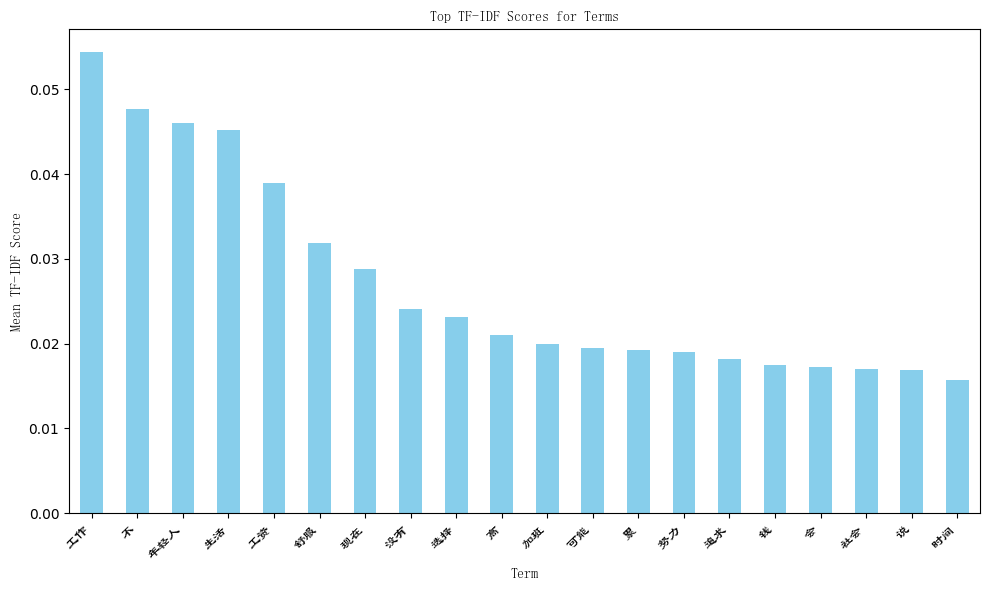

In [14]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Calculate mean TF-IDF scores for each term across all documents
mean_tfidf_scores = tfidf_df.mean(axis=0)

# Sort terms based on mean TF-IDF scores in descending order
sorted_terms = mean_tfidf_scores.sort_values(ascending=False)

# Select top N terms to visualize
top_n = 20  # You can adjust this value as needed
top_terms = sorted_terms[:top_n]

# Specify the path to the SimFang font file
font_path =  r'C:\Users\jesse\PycharmProjects\CN_Specturm\Fonts\SIMLI.TTF'

# Register the SimFang font with Matplotlib
custom_font = FontProperties(fname=font_path)

# Plot bar chart with custom font
plt.figure(figsize=(10, 6))
top_terms.plot(kind='bar', color='skyblue')
plt.title('Top TF-IDF Scores for Terms', fontproperties=custom_font)
plt.xlabel('Term', fontproperties=custom_font)
plt.ylabel('Mean TF-IDF Score', fontproperties=custom_font)
plt.xticks(rotation=45, ha='right', fontproperties=custom_font)
plt.tight_layout()
plt.show()

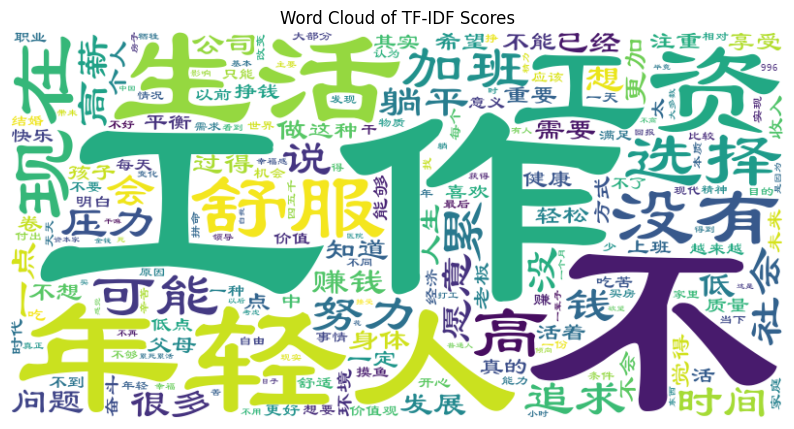

In [15]:
from wordcloud import WordCloud

# Generate word cloud with custom font
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(mean_tfidf_scores)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of TF-IDF Scores')
plt.axis('off')
plt.show()

In [16]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA model
num_topics = 5  # Adjust the number of topics as needed
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit LDA model to the DTM
lda_output = lda_model.fit_transform(dtm)

# Display the shape of the LDA output
print("Shape of LDA output:", lda_output.shape)

# Display the LDA model
print(lda_model)


Shape of LDA output: (4566, 5)
LatentDirichletAllocation(n_components=5, random_state=42)


In [17]:
# Define the column names for topic probabilities
topic_columns = ['topic_prob1', 'topic_prob2', 'topic_prob3', 'topic_prob4', 'topic_prob5']

# Create a DataFrame to store the document-level topic probabilities
topic_prob_df = pd.DataFrame(lda_output, columns=topic_columns)

# Combine the topic probabilities DataFrame with the original DataFrame df
df = pd.concat([df, topic_prob_df], axis=1)

# Write the combined DataFrame to a CSV file
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print("DataFrame with document-level topic probabilities has been saved")


DataFrame with document-level topic probabilities has been saved


In [18]:
from gensim import matutils
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

# Reverse the mapping from count_vectorizer vocabulary
id2word = {index: word for word, index in count_vectorizer.vocabulary_.items()}

# Create a corpus-like structure from CountVectorizer vocabulary
corpus_list = [[(index, 1)] for index in range(len(count_vectorizer.vocabulary_))]

# Convert Python dictionary to gensim Dictionary
gensim_dictionary = Dictionary.from_corpus(corpus_list, id2word=id2word)

# Convert scikit-learn DTM to gensim corpus
corpus = matutils.Sparse2Corpus(dtm.T)

# Convert scikit-learn LDA model to gensim-compatible format
num_topics = lda_model.n_components
lda_model_gensim = LdaModel(
    corpus=corpus,
    id2word=gensim_dictionary,
    num_topics=num_topics
)

# Visualize the LDA model using pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis_data = pyLDAvis.gensim.prepare(lda_model_gensim, corpus, gensim_dictionary)

# If you display it here, the button icons (save, insert cells, copy and run and etc up top) would be gone
# Don't know why............
# pyLDAvis.display(vis_data)

# Due to the random initialization of parameters and the stochastic nature of the algorithm, the visualization is slightly different each run.
# Later I will experiment with different values for hyperparameters 
# such as the number of topics, alpha, and beta to find the configuration 
# that yields stable and interpretable results.

In [19]:
from pyLDAvis import save_html

output_directory = r'C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Lay_Flat\CSV\Lay_Flat_lda_visualization.html'

# Save the visualization to an HTML file
pyLDAvis.save_html(vis_data, output_directory)
print("Visualized content has been saved to: ", output_directory)


Visualized content has been saved to:  C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Lay_Flat\CSV\Lay_Flat_lda_visualization.html


In [20]:
import webbrowser

# Open the HTML file in the default web browser
webbrowser.open_new_tab(output_directory)


True

In [21]:
import pandas as pd

# # Load the DataFrame
# df = pd.read_csv(file_path, encoding='utf-8-sig')

# Define a function to determine the topic(s) with the highest probability for each narrative
def get_max_topic(row):
    # Extract topic probabilities from the row
    topic_probs = row[['topic_prob1', 'topic_prob2', 'topic_prob3', 'topic_prob4', 'topic_prob5']]
    # Convert topic probabilities to float
    topic_probs = [float(prob) for prob in topic_probs]
    # Find the index of the topic with the highest probability
    max_topic_index = topic_probs.index(max(topic_probs))
    # Return the index of the topic with the highest probability
    return max_topic_index + 1  # Adding 1 to make the index 1-based

# Apply the function to each row to determine the topic(s) with the highest probability for each narrative
df['max_topic'] = df.apply(get_max_topic, axis=1)

# Append the newly generated columns to the original file
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print("Newly generated columns and data have been appended to the original file:", file_path)

Newly generated columns and data have been appended to the original file: C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Lay_Flat\CSV\Lay_Flat.csv


C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


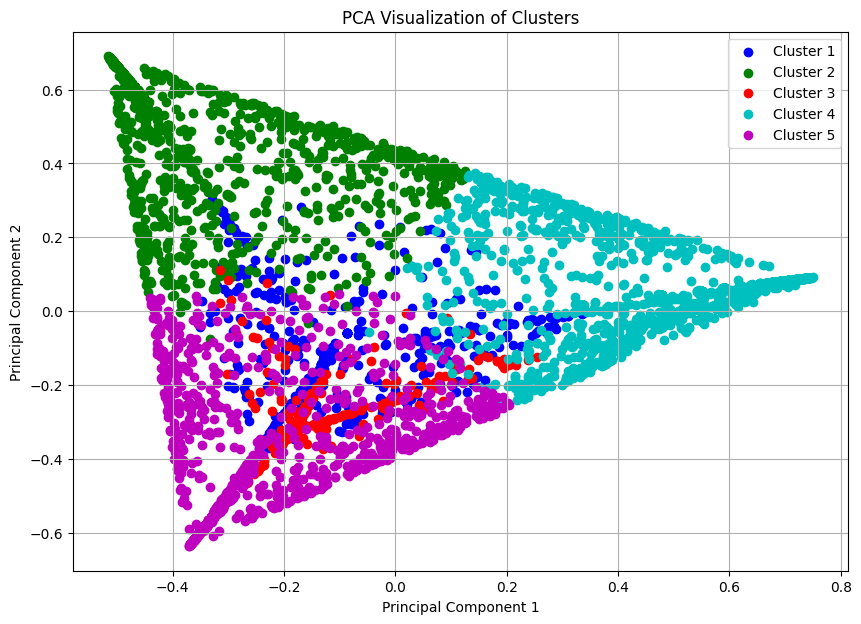

In [22]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Assuming lda_model is your trained LDA model and dtm is your document-term matrix
# Get dominant topic probabilities for each document
dominant_topics = [np.argmax(prob) for prob in lda_model.transform(dtm)]

# Assuming num_clusters is the number of clusters you want
num_clusters = 5  # You can adjust this value based on your dataset and requirements

# Perform K-means clustering based on dominant topic probabilities
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(lda_output)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(lda_output)

# Plot the clusters
plt.figure(figsize=(10, 7))

# Define colors for each cluster
colors = ['b', 'g', 'r', 'c', 'm']

for cluster_label, color in zip(range(num_clusters), colors):
    cluster_indices = np.where(clusters == cluster_label)[0]
    plt.scatter(pca_result[cluster_indices, 0], pca_result[cluster_indices, 1], c=color, label=f'Cluster {cluster_label + 1}')

plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
# Add cluster labels to the DataFrame
df['cluster_label'] = clusters

# Now you can save the DataFrame to a CSV file
file_path = file_path
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print("DataFrame with cluster labels has been saved to:", file_path)

DataFrame with cluster labels has been saved to: C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Lay_Flat\CSV\Lay_Flat.csv


In [24]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Filter data by cluster_label
clusters = df['cluster_label'].unique()
top_keywords_per_cluster = {}
top_terms_per_cluster = {}

# Step 2-4: Calculate top terms for each cluster
for cluster in clusters:
    # Filter data by cluster_label
    cluster_data = df[df['cluster_label'] == cluster]
    
    # Concatenate tokenized content for the cluster
    cluster_corpus = ' '.join(cluster_data['tokenized_content'])
    
    # Calculate TF-IDF scores for the cluster corpus
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([cluster_corpus])
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray()[0]
    
    # Get the top terms for the cluster based on TF-IDF scores
    top_term_indices = tfidf_scores.argsort()[-10:][::-1]  # Get indices of top 10 terms
    top_terms = [feature_names[idx] for idx in top_term_indices]
    
    # Store top terms for the cluster
    top_terms_per_cluster[cluster] = top_terms
    
    # Flatten the list of lists of terms
    keywords = [term for sublist in cluster_data["Top Terms"] for term in sublist]
    
    # Find the top 10 most frequent keywords for each cluster
    keyword_counter = Counter(keywords)
    top_keywords = keyword_counter.most_common(10)  # Get the top 10 most common keywords
    top_keywords_per_cluster[cluster] = [keyword[0] for keyword in top_keywords]  # Extract the keyword from (keyword, count) tuple

# Sort the dictionaries by cluster label
sorted_top_keywords_per_cluster = dict(sorted(top_keywords_per_cluster.items()))
sorted_top_terms_per_cluster = dict(sorted(top_terms_per_cluster.items()))

# Print the top 10 keywords for each cluster
print("Ten Most Frequent Words for Each Cluster")
for cluster, keywords in sorted_top_keywords_per_cluster.items():
    print(f"Cluster {cluster + 1} Most Frequent Words: {' '.join(keywords)}")

# Print top 10 terms for each cluster
print("\nTen Top Terms for Each Cluster")
for cluster, terms in sorted_top_terms_per_cluster.items():
    print(f"Cluster {cluster + 1} top terms: {' '.join(terms)}")


Ten Most Frequent Words for Each Cluster
Cluster 1 Most Frequent Words: 齿轮 增量 增长 处处 壁垒 生活 工作 年轻人 需求 收益
Cluster 2 Most Frequent Words: 加班 工作 公司 高薪 齿轮 老板 不 摸鱼 工资 领导
Cluster 3 Most Frequent Words: 工作 生活 年轻人 选择 追求 更加 可能 发展 注重 职业
Cluster 4 Most Frequent Words: 齿轮 舒服 工资 累 不 增量 高 增强 过得 处境
Cluster 5 Most Frequent Words: 年轻人 齿轮 生活 父母 工作 没有 孩子 现在 不 增量

Ten Top Terms for Each Cluster
Cluster 1 top terms: 工作 生活 年轻人 社会 现在 选择 没有 需要 努力 发展
Cluster 2 top terms: 工作 工资 加班 年轻人 没有 公司 现在 生活 时间 很多
Cluster 3 top terms: 工作 生活 年轻人 选择 追求 可能 社会 更加 发展 压力
Cluster 4 top terms: 工资 舒服 工作 生活 年轻人 现在 努力 没有 一点 身体
Cluster 5 top terms: 年轻人 工作 生活 现在 没有 工资 努力 很多 舒服 社会


In [25]:
# Now you can group the narratives by their assigned thematic clusters
grouped_clusters = df.groupby('cluster_label')

# Iterate over each thematic cluster and access the narratives within each cluster
for cluster_label, group_df in grouped_clusters:
    print(f"Cluster {cluster_label + 1}:")
    print(group_df['tokenized_content'].head())  # Here we pass the already tokenized text instead of the original content
    print()


Cluster 1:
17    ['几年', '前', '加班', '分析', '发出', '很多', '嗤之以鼻', '今...
25    ['岗位', '高薪', '缺人', '不愿', '高薪', '不愿', '加班', '年轻...
34    ['新', '中国', '成立', '1949', '年', '现在', '2024', '...
36    ['苏修', '集团', '近年来', '翻来复去', '要求', '苏联', '人民', ...
41    ['觉得', '图片', '回答', '社会', '信用', '体系', '崩溃', '吃'...
Name: tokenized_content, dtype: object

Cluster 2:
0    ['喜欢', '张', '雪峰', '那句话', '选', '工作', '不要', '优点'...
1    ['举个', '例子', '以前', '农民工', '工资', '年', '季度', '结算...
4    ['河神', '年轻', '工人', '找到', '这份', '月薪', '一万五', '9...
5    ['主持人', '采访', '德国人', '愿不愿意', '996', '税后', '5k'...
6    ['老丈人', '骂', '小舅子', '原话', '逢年过节', '不', '回来', '...
Name: tokenized_content, dtype: object

Cluster 3:
102    ['在我看来', '生活', '不仅仅', '生存', '更是', '一种', '体验', ...
112    ['当今社会', '观察', '显著', '现象', '越来越', '年轻人', '选择',...
114    ['快节奏', '时代', '每个', '生活', '奔波', '梦想', '拼搏', '这...
166    ['一种', '不断', '需求', '动物', '欲望', '满足', '往往', '会'...
184    ['现在', '年轻人', '选择', '工作', '时', '似乎', '越来越', '倾...
Name: tokenized_content, dtype: object

Cluster

In [26]:
# Initialize an empty dictionary to store the sentiment distribution for each cluster
sentiment_distribution = {}

# Iterate over each cluster
for cluster, group_df in grouped_clusters:
    # Count the occurrences of each sentiment label in the current cluster
    label_counts = group_df['sentiment_label'].value_counts()
    
    # Calculate the total number of narratives in the current cluster
    total_narratives = label_counts.sum()
    
    # Calculate the proportion of each sentiment label and store it in the sentiment distribution dictionary
    sentiment_distribution[cluster] = {
        'Positive': label_counts.get('Positive', 0) / total_narratives,
        'Negative': label_counts.get('Negative', 0) / total_narratives,
        'Neutral': label_counts.get('Neutral', 0) / total_narratives
    }

# Print the sentiment distribution for each cluster
for cluster, distribution in sentiment_distribution.items():
    print(f"Cluster {cluster + 1}:")
    for sentiment, proportion in distribution.items():
        print(f"   {sentiment}: {proportion:.2%}")
    print()


Cluster 1:
   Positive: 6.76%
   Negative: 72.34%
   Neutral: 20.90%

Cluster 2:
   Positive: 5.57%
   Negative: 75.60%
   Neutral: 18.83%

Cluster 3:
   Positive: 0.62%
   Negative: 54.98%
   Neutral: 44.40%

Cluster 4:
   Positive: 11.59%
   Negative: 79.41%
   Neutral: 9.00%

Cluster 5:
   Positive: 4.95%
   Negative: 80.78%
   Neutral: 14.27%



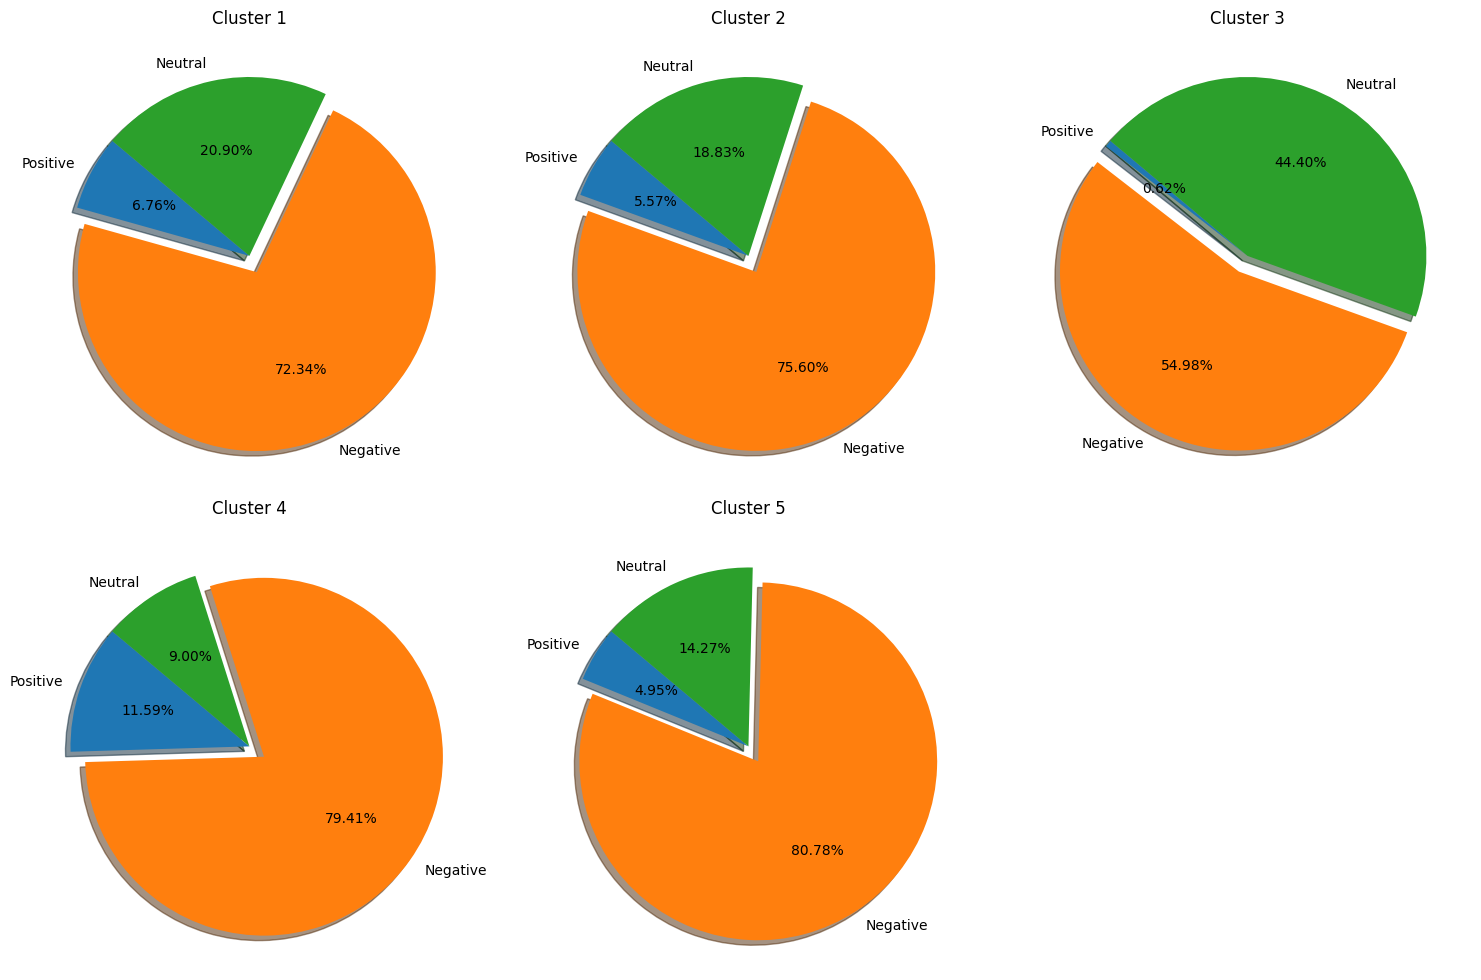

In [27]:
import matplotlib.pyplot as plt

# Plotting pie charts for each cluster
plt.figure(figsize=(15, 10))
for i, (cluster, distribution) in enumerate(sentiment_distribution.items(), 1):
    labels = distribution.keys()
    sizes = distribution.values()
    explode = (0, 0.1, 0)  # explode the 'Negative' slice
    plt.subplot(2, 3, i)
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=140)
    plt.title(f"Cluster {cluster + 1}")

plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
import spacy

# Load the Chinese NER model from spaCy
nlp = spacy.load("zh_core_web_sm")

# Load the CSV file
file_path = file_path
df = pd.read_csv(file_path)

# Define a function to perform Named Entity Recognition (NER) on text
def perform_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply NER to the '回答内容' column and create a new column for named entities
df['named_entities'] = df['回答内容'].apply(perform_ner)

# Display the dataframe with named entities
print(df[['回答内容', 'named_entities']].head())

# Save the named_entities to original CSV file
df.to_csv(file_path, index=False, encoding='utf-8-sig')
print("DataFrame with NER has been saved to the original file:", file_path)


                                                回答内容  \
0  很喜欢张雪峰的那句话：选工作，不要看优点，要看缺点能不能接受什么意思呢？这个行业高薪，但是 ...   
1  举个例子，以前农民工工资是按年、按季度结算的，比如一年10万块，或者每个季度发2-3万块；到...   
2         我活了五十岁才知道，对自己好点胜过一切。真羡慕现在的年轻人，这么早就明白了这个道理。   
3  我也招过不少年轻人了。宁愿钱少也不想操劳的年轻人，确实是一年比一年多了。不是因为懒惰，也不是...   
4  河神：年轻的工人哟，你找到的是这份月薪一万五、996的工作，还是这份月薪四千、965双休的工...   

                                      named_entities  
0  [(张雪峰, PERSON), (996, CARDINAL), (996, CARDINAL)]  
1  [(一年, DATE), (10万块, MONEY), (2, CARDINAL), (3万...  
2                                      [(五十岁, DATE)]  
3  [(一年, DATE), (一年多, DATE), (三板斧, CARDINAL), (30...  
4  [(一万五, CARDINAL), (996, CARDINAL), (四千、, CARDI...  
DataFrame with NER has been saved to the original file: C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Lay_Flat\CSV\Lay_Flat.csv


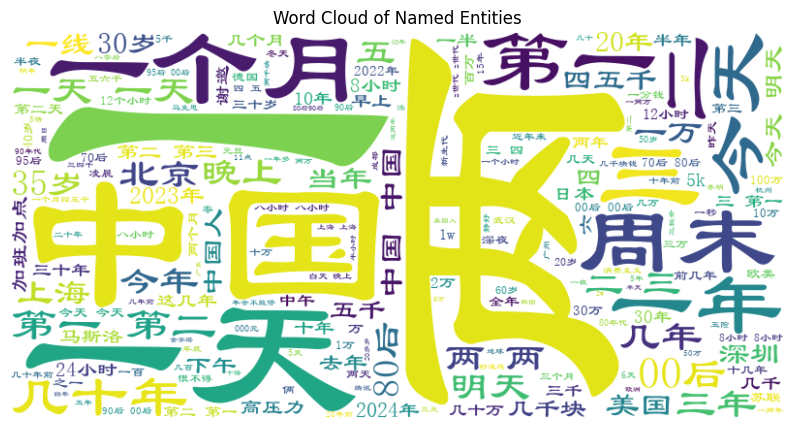

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of named entities
all_named_entities = [ent[0] for ents in df['named_entities'] for ent in ents]

# Join all named entities into a single string
all_named_entities_text = ' '.join(all_named_entities)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(all_named_entities_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Named Entities')
plt.axis('off')
plt.show()


In [30]:
from collections import Counter

# Function to extract named entities of a specific type from the dataframe
def extract_entities_by_type(entity_type):
    all_entities = [entity[0] for entities_list in df['named_entities'] for entity in entities_list if entity[1] == entity_type]
    return all_entities

# List of entity types
entity_types = ['GPE', 'ORG', 'NORP', 'PERSON', 'WORK_OF_ART', 'FAC', 'LOC', 'PRODUCT', 'EVENT', 'LANGUAGE', 'LAW', 'TIME', 'PERCENT', 'QUANTITY', 'ORDINAL', 'MISC']

# Iterate over each entity type and print the top 10 most frequent entities
for entity_type in entity_types:
    entities = extract_entities_by_type(entity_type)
    entity_counter = Counter(entities)
    top_entities = entity_counter.most_common(10)
    print(f"Top 10 {entity_type}:")
    for entity, count in top_entities:
        print(entity, count)
    print()


Top 10 GPE:
中国 183
上海 54
北京 46
美国 34
深圳 31
日本 29
高压力 22
加班加点 18
德国 13
日 12

Top 10 ORG:
新生代 10
腾讯 8
富豪 6
共产党 5
= 5
人民日报 4
北大 4
微软 4
台积电 4
苏修叛徒集团 3

Top 10 NORP:
中国人 29
中国 10
美国人 7
上海人 6
日本人 6
亚裔 5
儒家 4
苏联 3
北京人 3
中华 3

Top 10 PERSON:
谢邀 20
马斯洛 17
z世代 13
静好 9
80年代 9
马克思 8
舒适感 8
汤 8
李明 8
吴事实 8

Top 10 WORK_OF_ART:
人性天书72卷 8
年会不能停 8
明朝那些事儿 4
职场秘籍＋送礼绝学 4
新华字典 4
职场秘籍+送礼绝学 2
职场微系列（ 2
福布斯 2
连升三级 2
我的未来不是梦 2

Top 10 FAC:
金字塔 7
北极熊 3
消费主义 3
温柔乡 1
克里姆林宫 1
天安门城楼参会 1
玉门油田博物馆 1
冲劲儿 1
白马寺 1
样本pcr 1

Top 10 LOC:
欧美 12
地球 8
欧洲 7
东亚 5
非洲 3
欧洲人 3
东北 3
富士康 3
日落而息 2
富士 2

Top 10 PRODUCT:
996 7
75% 5
业5 2
955 2
开源 2
985 2
方便面 2
长安 2
文情怀 1
铁人 1

Top 10 EVENT:
中日战争 3
文革 2
第十四章[孤独 1
第十八章[ 1
十一 1
夜不闭户 1
第二国际成立大会 1
鸦片战争 1
义和团战争 1
辛亥革命战争 1

Top 10 LANGUAGE:
英语 2
英文 2
30% 1
康师傅 1
英语班 1
乌拉乌拉跑 1
汉语 1
温水煮青蛙 1

Top 10 LAW:
劳动法 4
资本论 2
国际职业发展 1
四不像教育公司 1
宪法 1
柳叶刀 1
中华人民共和国宪法 1
中华人民共和国劳动法 1
脱口秀大会 1

Top 10 TIME:
晚上 57
8小时 42
八小时 36
下午 25
早上 20
中午 18
24小时 16
12小时 16
白天 14
深夜 13

Top 10 PERCENT:
1. 45
80% 10
20% 6
40% 5


In [14]:
import pandas as pd
import re

# Define aspect-related terms and corresponding regular expressions based on the most frequent words and top terms from clusters
aspect_patterns = {
    'work_life_balance': r'(工作|生活|平衡|工作与生活|工作和生活|舒适|不累)',
    'financial_priorities': r'(财务|金钱观|经济|薪水|工资|经济压力|经济状况|收入|财务|财务自由)',
    'quality_of_life': r'(生活质量|舒适度|幸福感|幸福|心理健康|放松|休闲|压力|快乐|自由)',
    'career_satisfaction': r'(职业满意度|职业发展|职业选择|满足感|职业环境|工作环境|个人发展|发展|上升空间|提升|收获|升值|升职|加薪)',
    'social_cultural_influences': r'(社会文化影响|文化|社会压力|社会价值观|价值观|文化观念|社会风气|风气|社会变迁|社会趋势|趋势|环境|周遭|期待|父母|亲戚)',
    'economic_conditions': r'(经济条件|经济机会|经济形势|经济趋势|就业机会|职业前景|经济|大环境|下行|经济下行)',
    'personal_values_priorities': r'(个人|价值观|价值观|优先考虑|个人偏好|偏好|目标|追求|人生观|世界观|三观|选择)',
    'employment_trends': r'(就业|趋势|工作|模式|职业发展趋势|职业形态|就业形势|灵活工作|兼职|副业|失业|三和大神|经济下行|裁员|职场)',
    # Add more aspect patterns based on the identified aspects and their associated terms
}


# Define a function to perform rule-based aspect identification
def identify_aspects(text):
    aspects = []
    for aspect, pattern in aspect_patterns.items():
        matches = re.findall(pattern, text)
        if matches:
            aspects.append(aspect)  # Append the aspect category instead of the matched keyword
    if not aspects:
        aspects.append('others')  # Append 'others' if no aspect matches
    return aspects

# Apply rule-based aspect identification to the '回答内容' column
df['aspect_candidates'] = df['回答内容'].apply(identify_aspects)

# Display the dataframe with identified aspect categories
print(df[['回答内容', 'aspect_candidates']].head())

# Save the DataFrame to a CSV file
file_path = file_path
df.to_csv(file_path, index=False, encoding='utf-8-sig')
print("DataFrame with Rule-Based Aspect Identification has been saved to the original file:", file_path)


                                                回答内容  \
0  很喜欢张雪峰的那句话：选工作，不要看优点，要看缺点能不能接受什么意思呢？这个行业高薪，但是 ...   
1  举个例子，以前农民工工资是按年、按季度结算的，比如一年10万块，或者每个季度发2-3万块；到...   
2         我活了五十岁才知道，对自己好点胜过一切。真羡慕现在的年轻人，这么早就明白了这个道理。   
3  我也招过不少年轻人了。宁愿钱少也不想操劳的年轻人，确实是一年比一年多了。不是因为懒惰，也不是...   
4  河神：年轻的工人哟，你找到的是这份月薪一万五、996的工作，还是这份月薪四千、965双休的工...   

                                   aspect_candidates  
0             [work_life_balance, employment_trends]  
1          [work_life_balance, financial_priorities]  
2                                           [others]  
3  [work_life_balance, career_satisfaction, socia...  
4             [work_life_balance, employment_trends]  
DataFrame with Rule-Based Aspect Identification has been saved to the original file: C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Lay_Flat\CSV\Lay_Flat.csv


In [15]:
from collections import Counter

# Count the frequency of each aspect category
aspect_counts = Counter([item for sublist in df['aspect_candidates'] for item in sublist])

# Store the counts of each aspect category into variables
work_life_balance_count = aspect_counts.get('work_life_balance', 0)
financial_priorities_count = aspect_counts.get('financial_priorities', 0)
quality_of_life_count = aspect_counts.get('quality_of_life', 0)
career_satisfaction_count = aspect_counts.get('career_satisfaction', 0)
social_cultural_influences_count = aspect_counts.get('social_cultural_influences', 0)
economic_conditions_count = aspect_counts.get('economic_conditions', 0)
personal_values_priorities_count = aspect_counts.get('personal_values_priorities', 0)
employment_trends_count = aspect_counts.get('employment_trends', 0)
others_count = aspect_counts.get('others', 0)

# Display the counts
print("Work-Life Balance Count:", work_life_balance_count)
print("Financial Priorities Count:", financial_priorities_count)
print("Quality of Life Count:", quality_of_life_count)
print("Career Satisfaction Count:", career_satisfaction_count)
print("Social and Cultural Influences Count:", social_cultural_influences_count)
print("Economic Conditions Count:", economic_conditions_count)
print("Personal Values and Priorities Count:", personal_values_priorities_count)
print("Employment Trends Count:", employment_trends_count)
print("Others Count:", others_count)


Work-Life Balance Count: 2361
Financial Priorities Count: 1973
Quality of Life Count: 1267
Career Satisfaction Count: 796
Social and Cultural Influences Count: 1001
Economic Conditions Count: 451
Personal Values and Priorities Count: 1517
Employment Trends Count: 1883
Others Count: 1175


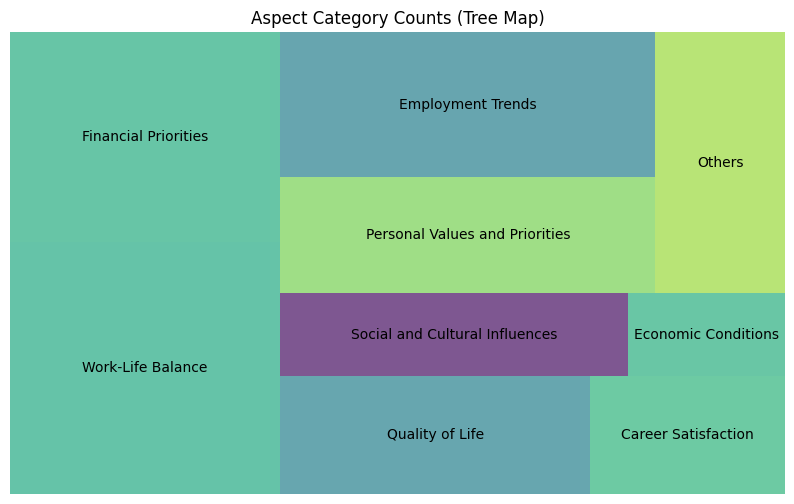

In [16]:
import matplotlib.pyplot as plt
import squarify

# Create a dictionary to store aspect category counts
aspect_counts_dict = {
    'Work-Life Balance': work_life_balance_count,
    'Financial Priorities': financial_priorities_count,
    'Quality of Life': quality_of_life_count,
    'Career Satisfaction': career_satisfaction_count,
    'Social and Cultural Influences': social_cultural_influences_count,
    'Economic Conditions': economic_conditions_count,
    'Personal Values and Priorities': personal_values_priorities_count,
    'Employment Trends': employment_trends_count,
    'Others': others_count
}

# Plotting the tree map
plt.figure(figsize=(10, 6))
squarify.plot(sizes=aspect_counts_dict.values(), label=aspect_counts_dict.keys(), alpha=0.7)
plt.axis('off')
plt.title('Aspect Category Counts (Tree Map)')
plt.show()


In [17]:
# Filter rows containing 'work_life_balance' in the aspect_candidates column
work_life_balance_rows = df[df['aspect_candidates'].apply(lambda x: 'work_life_balance' in x)]

# Calculate sentiment distribution for 'work_life_balance'
work_life_balance_sentiments = work_life_balance_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
work_life_balance_sentiments = work_life_balance_sentiments.round(2)

# Print sentiment distribution for 'work_life_balance'
print("Sentiment distribution for 'Work-Life Balance':")
print("Positive:", work_life_balance_sentiments.get('Positive', 0), "%")
print("Negative:", work_life_balance_sentiments.get('Negative', 0), "%")
print("Neutral:", work_life_balance_sentiments.get('Neutral', 0), "%")
print()

# Filter rows containing 'financial_priorities' in the aspect_candidates column
financial_priorities_rows = df[df['aspect_candidates'].apply(lambda x: 'financial_priorities' in x)]

# Calculate sentiment distribution for 'financial_priorities'
financial_priorities_sentiments = financial_priorities_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
financial_priorities_sentiments = financial_priorities_sentiments.round(2)

# Print sentiment distribution for 'financial_priorities'
print("Sentiment distribution for 'Financial Priorities':")
print("Positive:", financial_priorities_sentiments.get('Positive', 0), "%")
print("Negative:", financial_priorities_sentiments.get('Negative', 0), "%")
print("Neutral:", financial_priorities_sentiments.get('Neutral', 0), "%")
print()

# Filter rows containing 'quality_of_life' in the aspect_candidates column
quality_of_life_rows = df[df['aspect_candidates'].apply(lambda x: 'quality_of_life' in x)]

# Calculate sentiment distribution for 'quality_of_life'
quality_of_life_sentiments = quality_of_life_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
quality_of_life_sentiments = quality_of_life_sentiments.round(2)

# Print sentiment distribution for 'quality_of_life'
print("Sentiment distribution for 'Quality of Life':")
print("Positive:", quality_of_life_sentiments.get('Positive', 0), "%")
print("Negative:", quality_of_life_sentiments.get('Negative', 0), "%")
print("Neutral:", quality_of_life_sentiments.get('Neutral', 0), "%")
print()

# Filter rows containing 'career_satisfaction' in the aspect_candidates column
career_satisfaction_rows = df[df['aspect_candidates'].apply(lambda x: 'career_satisfaction' in x)]

# Calculate sentiment distribution for 'career_satisfaction'
career_satisfaction_sentiments = career_satisfaction_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
career_satisfaction_sentiments = career_satisfaction_sentiments.round(2)

# Print sentiment distribution for 'career_satisfaction'
print("Sentiment distribution for 'Career Satisfaction':")
print("Positive:", career_satisfaction_sentiments.get('Positive', 0), "%")
print("Negative:", career_satisfaction_sentiments.get('Negative', 0), "%")
print("Neutral:", career_satisfaction_sentiments.get('Neutral', 0), "%")
print()

# Filter rows containing 'social_cultural_influences' in the aspect_candidates column
social_cultural_influences_rows = df[df['aspect_candidates'].apply(lambda x: 'social_cultural_influences' in x)]

# Calculate sentiment distribution for 'social_cultural_influences'
social_cultural_influences_sentiments = social_cultural_influences_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
social_cultural_influences_sentiments = social_cultural_influences_sentiments.round(2)

# Print sentiment distribution for 'social_cultural_influences'
print("Sentiment distribution for 'Social and Cultural Influences':")
print("Positive:", social_cultural_influences_sentiments.get('Positive', 0), "%")
print("Negative:", social_cultural_influences_sentiments.get('Negative', 0), "%")
print("Neutral:", social_cultural_influences_sentiments.get('Neutral', 0), "%")
print()

# Filter rows containing 'economic_conditions' in the aspect_candidates column
economic_conditions_rows = df[df['aspect_candidates'].apply(lambda x: 'economic_conditions' in x)]

# Calculate sentiment distribution for 'economic_conditions'
economic_conditions_sentiments = economic_conditions_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
economic_conditions_sentiments = economic_conditions_sentiments.round(2)

# Print sentiment distribution for 'economic_conditions'
print("Sentiment distribution for 'Economic Conditions':")
print("Positive:", economic_conditions_sentiments.get('Positive', 0), "%")
print("Negative:", economic_conditions_sentiments.get('Negative', 0), "%")
print("Neutral:", economic_conditions_sentiments.get('Neutral', 0), "%")
print()

# Filter rows containing 'personal_values_priorities' in the aspect_candidates column
personal_values_priorities_rows = df[df['aspect_candidates'].apply(lambda x: 'personal_values_priorities' in x)]

# Calculate sentiment distribution for 'personal_values_priorities'
personal_values_priorities_sentiments = personal_values_priorities_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
personal_values_priorities_sentiments = personal_values_priorities_sentiments.round(2)

# Print sentiment distribution for 'personal_values_priorities'
print("Sentiment distribution for 'Personal Values and Priorities':")
print("Positive:", personal_values_priorities_sentiments.get('Positive', 0), "%")
print("Negative:", personal_values_priorities_sentiments.get('Negative', 0), "%")
print("Neutral:", personal_values_priorities_sentiments.get('Neutral', 0), "%")
print()

# Filter rows containing 'employment_trends' in the aspect_candidates column
employment_trends_rows = df[df['aspect_candidates'].apply(lambda x: 'employment_trends' in x)]

# Calculate sentiment distribution for 'employment_trends'
employment_trends_sentiments = employment_trends_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
employment_trends_sentiments = employment_trends_sentiments.round(2)

# Print sentiment distribution for 'employment_trends'
print("Sentiment distribution for 'Employment Trends':")
print("Positive:", employment_trends_sentiments.get('Positive', 0), "%")
print("Negative:", employment_trends_sentiments.get('Negative', 0), "%")
print("Neutral:", employment_trends_sentiments.get('Neutral', 0), "%")
print()

# Filter rows containing 'others' in the aspect_candidates column
others_rows = df[df['aspect_candidates'].apply(lambda x: 'others' in x)]

# Calculate sentiment distribution for 'others'
others_sentiments = others_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
others_sentiments = others_sentiments.round(2)

# Print sentiment distribution for 'others'
print("Sentiment distribution for 'Others':")
print("Positive:", others_sentiments.get('Positive', 0), "%")
print("Negative:", others_sentiments.get('Negative', 0), "%")
print("Neutral:", others_sentiments.get('Neutral', 0), "%")
print()


Sentiment distribution for 'Work-Life Balance':
Positive: 1.48 %
Negative: 73.66 %
Neutral: 24.86 %

Sentiment distribution for 'Financial Priorities':
Positive: 2.79 %
Negative: 72.88 %
Neutral: 24.33 %

Sentiment distribution for 'Quality of Life':
Positive: 1.34 %
Negative: 66.38 %
Neutral: 32.28 %

Sentiment distribution for 'Career Satisfaction':
Positive: 0.38 %
Negative: 58.29 %
Neutral: 41.33 %

Sentiment distribution for 'Social and Cultural Influences':
Positive: 0.9 %
Negative: 60.34 %
Neutral: 38.76 %

Sentiment distribution for 'Economic Conditions':
Positive: 0.44 %
Negative: 60.31 %
Neutral: 39.25 %

Sentiment distribution for 'Personal Values and Priorities':
Positive: 1.19 %
Negative: 67.17 %
Neutral: 31.64 %

Sentiment distribution for 'Employment Trends':
Positive: 1.12 %
Negative: 70.84 %
Neutral: 28.04 %

Sentiment distribution for 'Others':
Positive: 17.7 %
Negative: 72.68 %
Neutral: 9.62 %



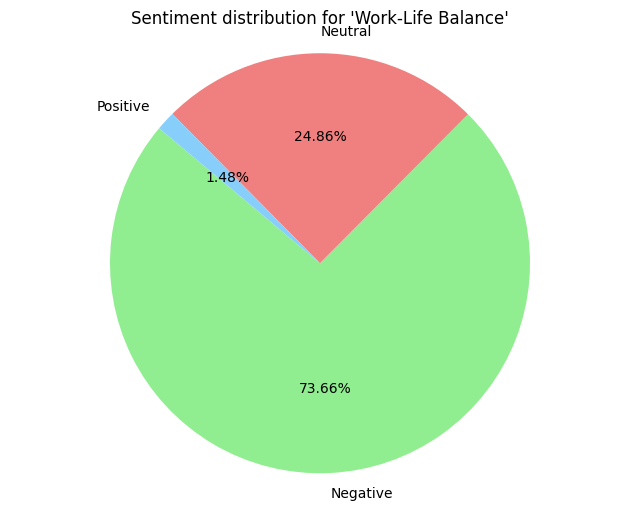

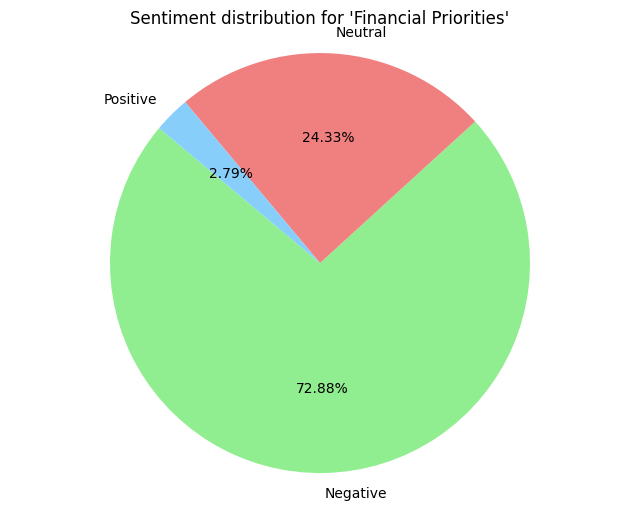

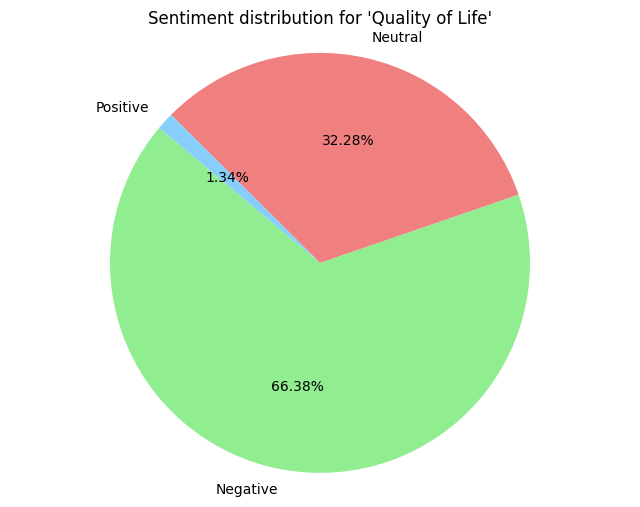

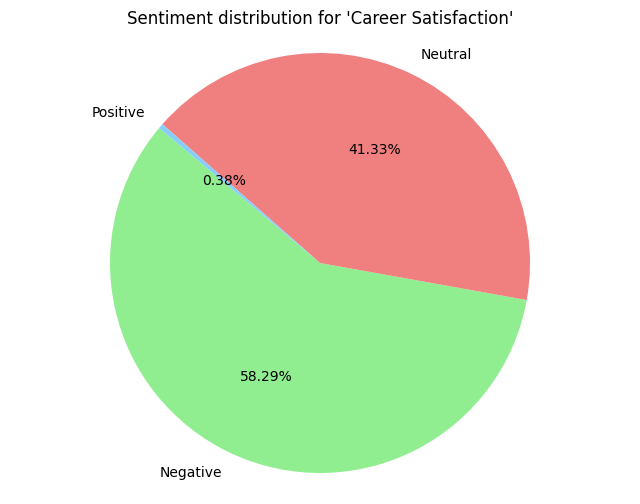

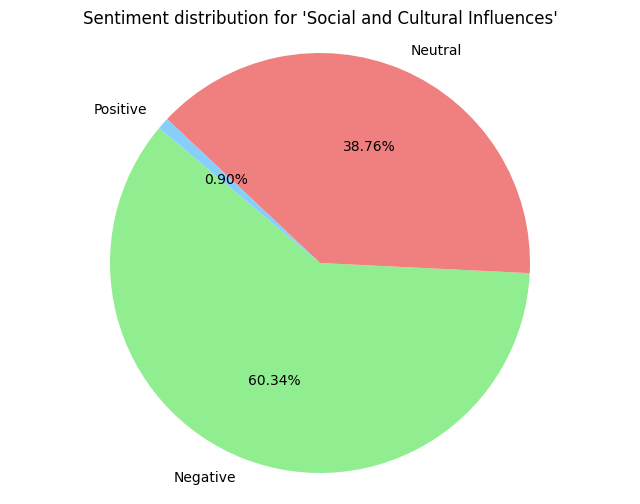

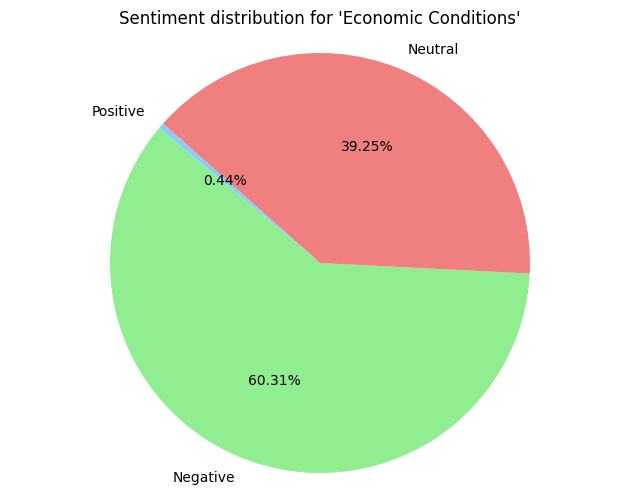

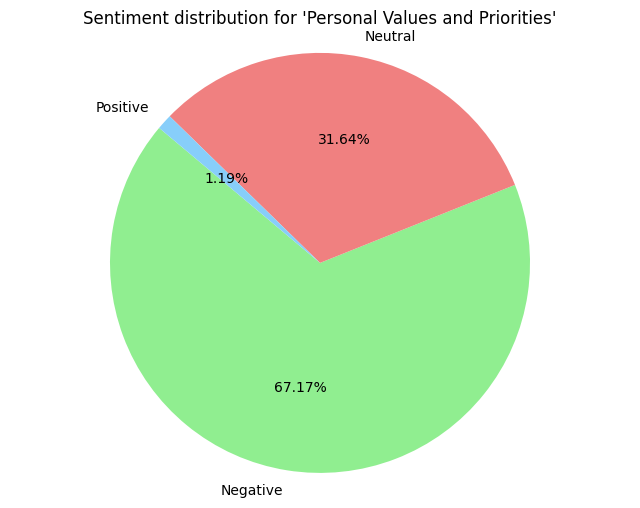

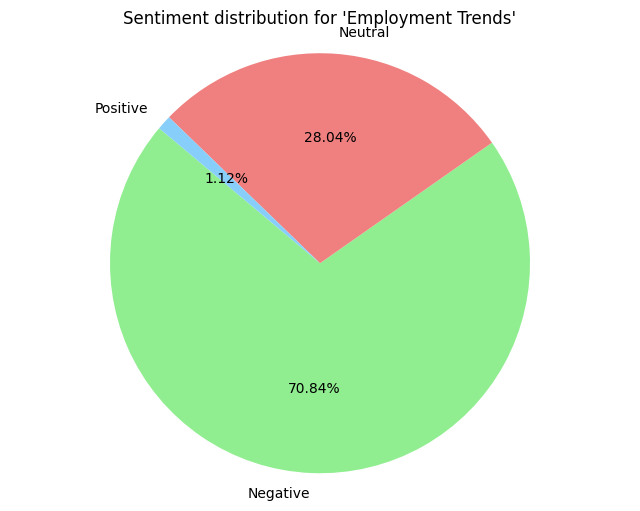

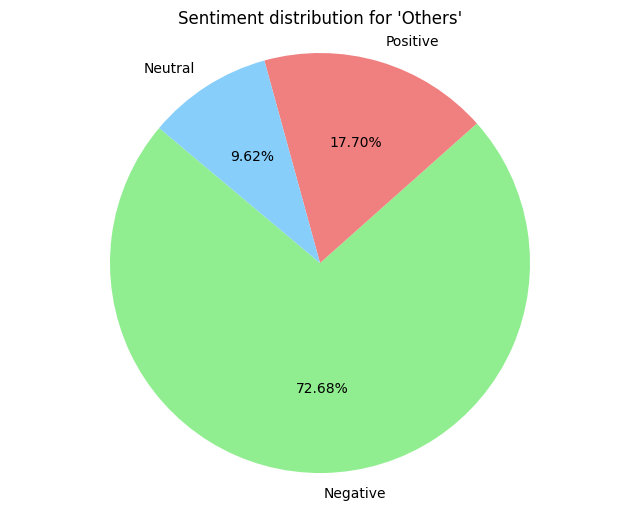

In [18]:
import matplotlib.pyplot as plt

# Define a function to create a pie chart for sentiment distribution
def plot_pie_chart(sentiments, aspect_name):
    labels = sentiments.index
    sizes = sentiments.values
    colors = ['lightgreen', 'lightcoral', 'lightskyblue']
    
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f"Sentiment distribution for '{aspect_name}'")
    plt.show()

# Plot pie chart for 'work_life_balance'
plot_pie_chart(work_life_balance_sentiments, 'Work-Life Balance')

# Plot pie chart for 'financial_priorities'
plot_pie_chart(financial_priorities_sentiments, 'Financial Priorities')

# Plot pie chart for 'quality_of_life'
plot_pie_chart(quality_of_life_sentiments, 'Quality of Life')

# Plot pie chart for 'career_satisfaction'
plot_pie_chart(career_satisfaction_sentiments, 'Career Satisfaction')

# Plot pie chart for 'social_cultural_influences'
plot_pie_chart(social_cultural_influences_sentiments, 'Social and Cultural Influences')

# Plot pie chart for 'economic_conditions'
plot_pie_chart(economic_conditions_sentiments, 'Economic Conditions')

# Plot pie chart for 'personal_values_priorities'
plot_pie_chart(personal_values_priorities_sentiments, 'Personal Values and Priorities')

# Plot pie chart for 'employment_trends'
plot_pie_chart(employment_trends_sentiments, 'Employment Trends')

# Plot pie chart for 'others'
plot_pie_chart(others_sentiments, 'Others')


In [19]:
import pandas as pd
import gc

def get_dataframes_in_memory():
    """
    Get the names and number of DataFrames currently in memory.
    """
    dataframes = [(name, obj) for name, obj in globals().items() if isinstance(obj, pd.DataFrame)]
    return dataframes

# Print the names and number of DataFrames currently in memory
dataframes_in_memory = get_dataframes_in_memory()
num_dataframes = len(dataframes_in_memory)
print(f"Number of DataFrames in memory: {num_dataframes}")

if num_dataframes > 0:
    print("Names of DataFrames in memory:")
    for name, _ in dataframes_in_memory:
        print(name)


Number of DataFrames in memory: 12
Names of DataFrames in memory:
_
df
_1
work_life_balance_rows
financial_priorities_rows
quality_of_life_rows
career_satisfaction_rows
social_cultural_influences_rows
economic_conditions_rows
personal_values_priorities_rows
employment_trends_rows
others_rows
